In [1]:
import numpy as np
import pandas

1- Load the data from the data-logistic.csv file. This is a two-dimensional sample, the target variable on which takes the values -1 or 1.

1- Загрузите данные из файла data-logistic.csv. Это двумерная выборка, целевая переменная на которой принимает значения -1 или 1.

In [2]:
data=pandas.read_csv('logistic.csv',header=None)
X=np.array(data.loc[:,1:])
y=np.array(data.loc[:,0])
print "input/output shapes : {}/{}".format(X.shape,y.shape)
data.info()
print '-'*20
print data.describe()
print '-'*20
print data.head()

input/output shapes : (205, 2)/(205,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
0    205 non-null int64
1    205 non-null float64
2    205 non-null float64
dtypes: float64(2), int64(1)
memory usage: 4.9 KB
--------------------
               0           1           2
count  205.00000  205.000000  205.000000
mean     0.02439    0.703925    0.681453
std      1.00215    2.332041    2.546902
min     -1.00000  -12.977800  -17.677268
25%     -1.00000   -0.264257   -0.206879
50%      1.00000    1.014348    1.027139
75%      1.00000    2.048088    2.032488
max      1.00000    4.465992    4.228316
--------------------
   0         1         2
0 -1 -0.663827 -0.138526
1  1  1.994596  2.468025
2 -1 -1.247395  0.749425
3  1  2.309374  1.899836
4  1  0.849143  2.407750


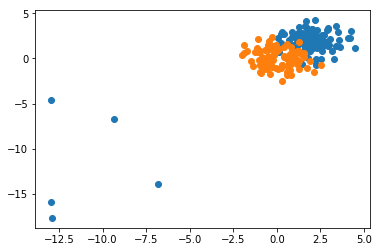

In [3]:
from lib.plotmd import scatterData,plotDecisionBoundary
import matplotlib.pyplot as plt

classmap={-1:"Negatives",1:"Positives"}
scatterData(X,y,classmap)
plt.show()

2- Make sure that the above formulas are correct for gradient descent. Please note that we use a full gradient descent, and not its stochastic version!

2-Убедитесь, что выше выписаны правильные формулы для градиентного спуска. Обратите внимание, что мы используем полноценный градиентный спуск, а не его стохастический вариант!

3- Implement a gradient descent for the usual and L2-regularized (with a regularization factor of 10) logistic regression. Use the step length k = 0.1. Use the vector (0, 0) as the initial approximation.

3- Реализуйте градиентный спуск для обычной и L2-регуляризованной (с коэффициентом регуляризации 10) логистической регрессии. Используйте длину шага k=0.1. В качестве начального приближения используйте вектор (0, 0).

In [4]:
from sklearn.linear_model import SGDClassifier
clf1 = SGDClassifier(alpha=0.1,penalty='l2',eta0=0)
#alpha=10,penalty='l2',learning_rate=0.1,eta0=0
clf1.fit(X,y)
y_predict1=clf1.predict(X)

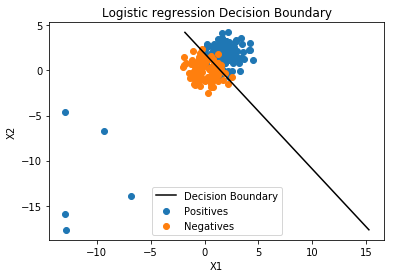

In [5]:
from lib.plotmd import scatterData,plotDecisionBoundary
import matplotlib.pyplot as plt

classmap={-1:"Negatives",1:"Positives"}
scatterData(X,y,classmap)

w = clf1.coef_[0]
bias= clf1.intercept_[0]
fig_boundary={}
fig_boundary["x_min"],fig_boundary["x_max"]= X[:,0].min(),X[:,0].max()
fig_boundary["y_min"],fig_boundary["y_max"]= X[:,1].min(),X[:,1].max()
plotDecisionBoundary(w,bias,fig_boundary)

plt.title("Logistic regression Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

In [18]:
clf2 = SGDClassifier(alpha=10,loss='log',penalty='l2',eta0=0.1,warm_start=True,learning_rate='constant',n_iter=10000)
clf2.coef_=[[0,0]]
clf2.intercept_=0
clf2.fit(X,y)
y_predict2=clf2.predict(X)

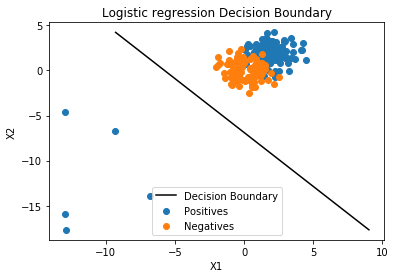

In [19]:
from lib.plotmd import scatterData,plotDecisionBoundary
import matplotlib.pyplot as plt

classmap={-1:"Negatives",1:"Positives"}
scatterData(X,y,classmap)

w = clf2.coef_[0]
bias= clf2.intercept_[0]
fig_boundary={}
fig_boundary["x_min"],fig_boundary["x_max"]= min(X[:,0]),max(X[:,0])
fig_boundary["y_min"],fig_boundary["y_max"]= min(X[:,1]),max(X[:,1])
plotDecisionBoundary(w,bias,fig_boundary)

plt.title("Logistic regression Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import roc_auc_score
r1=  roc_auc_score(y,y_predict1)
r2= roc_auc_score(y,y_predict2)
from lib.helpersmd import write_to_file
write_to_file("{:0.2f} {:0.2f}".format(r1,r2),"week%d-A%dT%d.out"%(3,3,1))
#write_to_file(str(r1)+' '+str(r2),'ans1.out')
print r1,r2


0.897142857143 0.68119047619
